# **FitTech ვარჯიშის აპლიკაცია: მომხმარებელთა ჩართულობის ანალიზი 2023-ში**


**შესავალი**  

FitTech ვარჯიშის მაკონტროლებელი აპლიკაციაა, რომელიც ბაზარზე უკვე სამი წელია არსებობს. როგორც მონაცემთა ანალიტიკოსი, ჩემი როლია, გავაანალიზო მომხმარებელთა აქტივობების გასული წლის მონაცემები, რათა წარმოდგენა შევქმნა აპლიკაციის ეფექტურობაზე. ზემოაღნიშნული ანალიზის მიზანია, შევიმუშავოთ რეკომენდაციები FitTech-ის სამომავლო ზრდისთვის.


## **2. ზოგადი შედეგები**

მოცემულ კოდში ვაფასებთ FitTech-ის მონაცემებთა საფუძველზე ორ ძირითად მაჩვენებელს:

* აქტიური მომხმარებლების საერთო რაოდენობა
* ვარჯიშის სესიების საერთო რაოდენობა


In [138]:
import pandas as pd
# ჩატვირთეთ მონაცემები
df = pd.read_csv("fittech_data.csv")                # გამოიყენეთ .read_csv()

total_active_users =df['მომხმარებლის ID'].nunique()  # გამოიყენეთ .nunique()
total_workouts = len(df)     # გამოიყენეთ len()

print(f"აქტიური მომხმარებლების საერთო რაოდენობა: {total_active_users:,}")
print(f"ვარჯიშის სესიების საერთო რაოდენობა: {total_workouts:,}")

აქტიური მომხმარებლების საერთო რაოდენობა: 10,000
ვარჯიშის სესიების საერთო რაოდენობა: 477,481


**დასკვნა:**   

FitTech აპლიკაციის გასული წლის მონაცემების ანალიზი გვიჩვენებს, რომ აპლიკაციას ჰყავს **10,000 აქტიური მომხმარებელი**. ეს რიცხვი ასახავს ინდივიდთა იმ რაოდენობას, რომლებმაც ისარგებლეს ამ აპლიკაციით განსაზღვრულ პერიოდში.   
ამასთანავე, ანალიზის საფუძველზე, 10,000 აქტიური მომხმარებლის მიერ ჯამში სულ ჩატარდა **477,481 ვარჯიშის სესია**, ანუ საშუალოდ, ერთი მომხმარებელი წელიწადში 47-48 ვარჯიშს ასრულებს, რაც მიუთითებს აპლიკაციის რეგულარულ და აქტიურ გამოყენებაზე.




## **3. ვარჯიშის ტიპების ეფექტურობა**

განვიხილოთ, თუ როგორ შეუწყო ხელი თითოეულმა ვარჯიშის ტიპმა მომხმარებელთა ჩართულობას:


In [141]:
workout_performance =df.groupby('ვარჯიშის ტიპი').agg({
      'ხანგრძლივობა': ['mean', 'sum'],                      # საშუალო და ჯამური ხანგრძლივობა
      'დამწვარი კალორიები': 'sum',                          # კალორიების ჯამი
      'მომხმარებლის ID': 'count'                          # უნიკალური მომხმარებლების რაოდენობა (სესიები)

})  # გამოიყენეთ .groupby() .agg() ფუნქციები და 'mean', 'sum', 'count' აგრეგაციები

workout_performance.columns = ['საშუალო ხანგრძლივობა', 'ჯამური ხანგრძლივობა', 'ჯამური კალორიები', 'სესიები']


# workout_performance დაასორტირეთ სესიების რიცხვით კლებადი რიგით = გამოიყენეთ .sort_values()
workout_performance = workout_performance.sort_values(by='სესიები', ascending=False)

print(workout_performance)


               საშუალო ხანგრძლივობა  ჯამური ხანგრძლივობა  ჯამური კალორიები  \
ვარჯიშის ტიპი                                                                
სირბილი                   37.497889         6.271859e+06      4.704373e+07   
იოგა                      67.510458         6.469055e+06      3.234402e+07   
ველოსიპედი                37.444090         3.572990e+06      1.787051e+07   
ცურვა                     37.469173         2.663908e+06      1.330985e+07   
ძალოსნობა                 37.521945         1.796588e+06      1.077242e+07   

               სესიები  
ვარჯიშის ტიპი           
სირბილი         167259  
იოგა             95823  
ველოსიპედი       95422  
ცურვა            71096  
ძალოსნობა        47881  


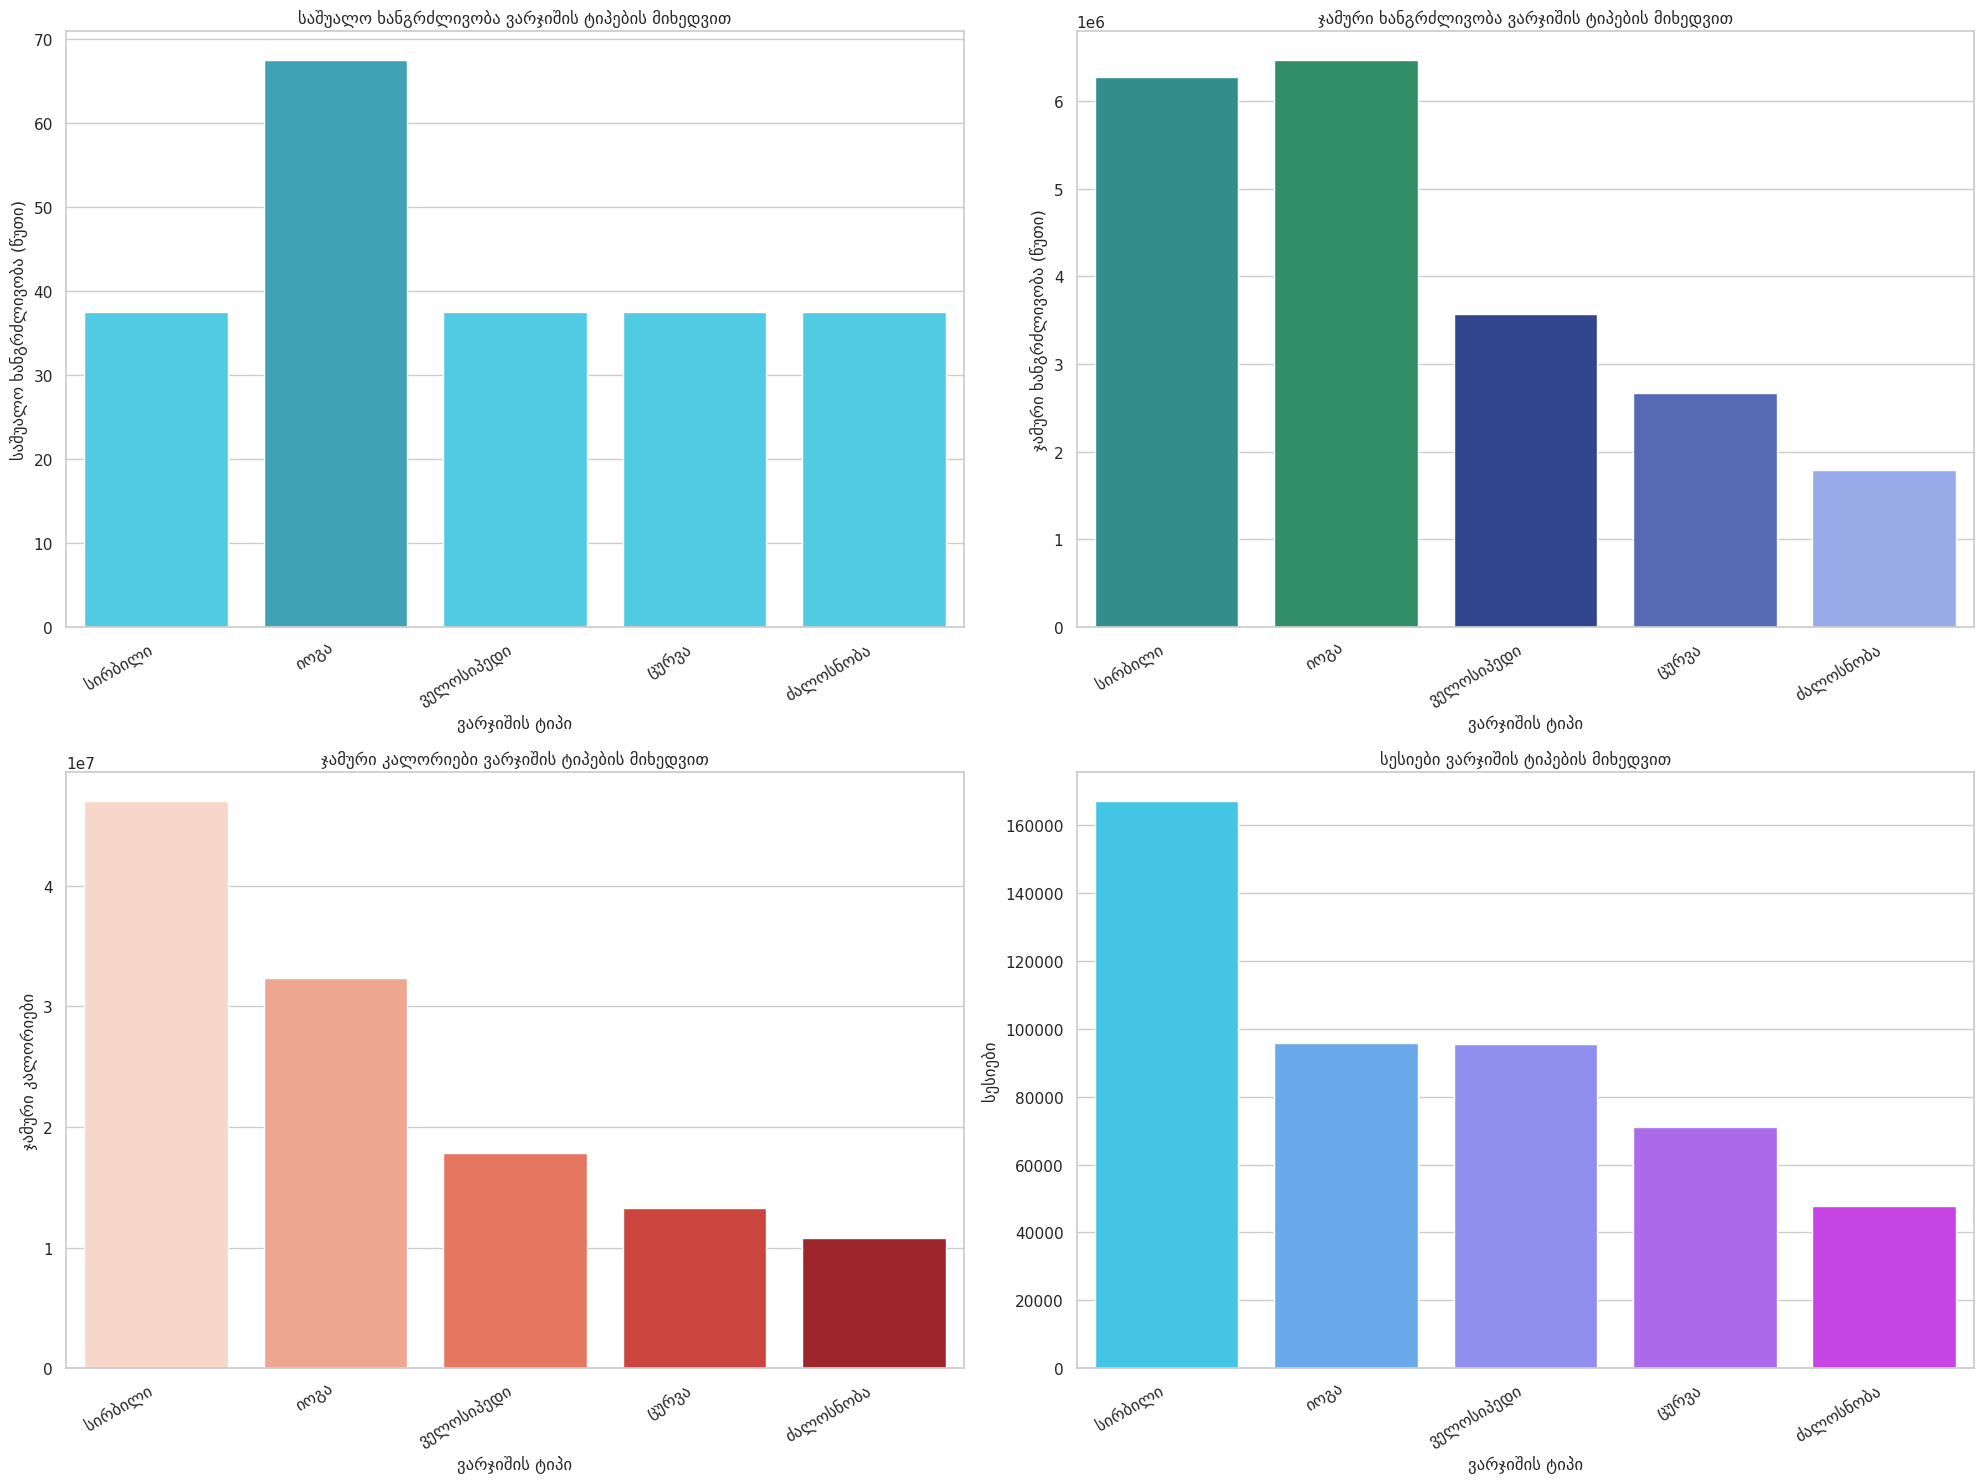

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(20, 15))

# 1. საშუალო ხანგრძლივობა
first_palette=['#38dcfc', '#2cafc9','#38dcfc','#38dcfc','#38dcfc']
plt.subplot(2, 2, 1)
sns.barplot(x=workout_performance.index, y=workout_performance['საშუალო ხანგრძლივობა'], hue=workout_performance.index, palette=first_palette, legend=False)
plt.title('საშუალო ხანგრძლივობა ვარჯიშის ტიპების მიხედვით')
plt.xlabel('ვარჯიშის ტიპი')
plt.ylabel('საშუალო ხანგრძლივობა (წუთი)')
plt.xticks(rotation=30, ha='right', fontsize=12)  

# 2. ჯამური ხანგრძლივობა 
second_palette=['#219e9a', '#219e68','#213c9e','#4560c4','#8ba2f7']
plt.subplot(2, 2, 2)
sns.barplot(x=workout_performance.index, y=workout_performance['ჯამური ხანგრძლივობა'], hue=workout_performance.index, palette=second_palette, legend=False)
plt.title('ჯამური ხანგრძლივობა ვარჯიშის ტიპების მიხედვით')
plt.xlabel('ვარჯიშის ტიპი')
plt.ylabel('ჯამური ხანგრძლივობა (წუთი)')
plt.xticks(rotation=30, ha='right', fontsize=12)  

# 3. ჯამური კალორიები
plt.subplot(2, 2, 3)
sns.barplot(x=workout_performance.index, y=workout_performance['ჯამური კალორიები'], hue=workout_performance.index, palette='Reds', legend=False)
plt.title('ჯამური კალორიები ვარჯიშის ტიპების მიხედვით')
plt.xlabel('ვარჯიშის ტიპი')
plt.ylabel('ჯამური კალორიები')
plt.xticks(rotation=30, ha='right', fontsize=12)  

# 4. სესიები
plt.subplot(2, 2, 4)
sns.barplot(x=workout_performance.index, y=workout_performance['სესიები'], hue=workout_performance.index, palette='cool', legend=False)
plt.title('სესიები ვარჯიშის ტიპების მიხედვით')
plt.xlabel('ვარჯიშის ტიპი')
plt.ylabel('სესიები')
plt.xticks(rotation=30, ha='right', fontsize=12) 


plt.tight_layout()
plt.show()



**მიგნებები:**

- **გამორჩეული ვარჯიშის ტიპები** - ვარჯიშის ტიპებს შორის როგორც სესიების რაოდენობით (167259 სესია), ისე ჯამური კალორიების კუთხით (47,043,730 კალორია) ლიდერობს **სირბილი**. ეს მიუთითებს, რომ სირბილი არის ყველაზე პოპულარული და ეფექტური ვარჯიშის ტიპი კალორიების წვის თვალსაზრისით.  
ყველაზე მაღალი საშუალო ხანგრძლივობა (67.5 წუთი) და ჯამური ხანგრძლივობა (6,271,859 წუთი) აქვს **იოგას** (95823 სესიით), რაც აჩვენებს, რომ მომხმარებლები იოგას სესიებს უფრო მეტ დროს უთმობენ ვიდრე სხვა ვარჯიშებს.

- **ნაკლებად გამორჩეული ვარჯიშის ტიპები** -  **ძალოსნობა** და **ცურვა** წარმოადგენენ ვარჯიშის ტიპებს, რომელთაც აქვთ ჯამური სესიების რიცხვი ყველაზე დაბალი (ძალოსნობა - 47881   და ცურვა - 71096 ). ეს მიუთითებს, რომ ამ ტიპის ვარჯიშებს ნაკლები მომხმარებელი ირჩევს.


**რეკომენდაცია:**

- **მაღალი ჩართულობის გაძლიერება** - ბიზნესმა უნდა იზრუნოს სირბილის და იოგას გარშემო დამატებითი ინიციატივების შექმნაზე, რათა კიდევ უფრო მეტად გააძლიეროს მომხმარებლების ჩართულობა.

- **ნაკლებად აქტიური ვარჯიშის ტიპების პოპულარიზაცია** -  სასურველია, ისეთი ვარჯიშის ტიპების პოპულარიზაცია, რომლებშიც მომხარებლები ნაკლებად არიან ჩართულნი. ბიზნესმა შეიძლება გაატაროს სპეციალური მარკეტინგული კამპანიები, რომლებიც ამ ტიპის ვარჯიშის სარგებელს უფრო მეტად წარმოაჩენს.


## **4. მომხმარებელთა კმაყოფილება**

ახლა ვნახოთ, როგორ აფასებენ მომხმარებლები სხვადასხვა ტიპის ვარჯიშებს:


In [145]:
workout_ratings = df.groupby('ვარჯიშის ტიპი')['მომხმარებლის შეფასება'].mean().sort_values(ascending=False) # გამოიყენეთ .groupby(), .mean() და .sort_values(ascending=False)

print(workout_ratings)

ვარჯიშის ტიპი
ველოსიპედი    4.001352
სირბილი       3.505079
ცურვა         3.503530
იოგა          3.501863
ძალოსნობა     2.499488
Name: მომხმარებლის შეფასება, dtype: float64


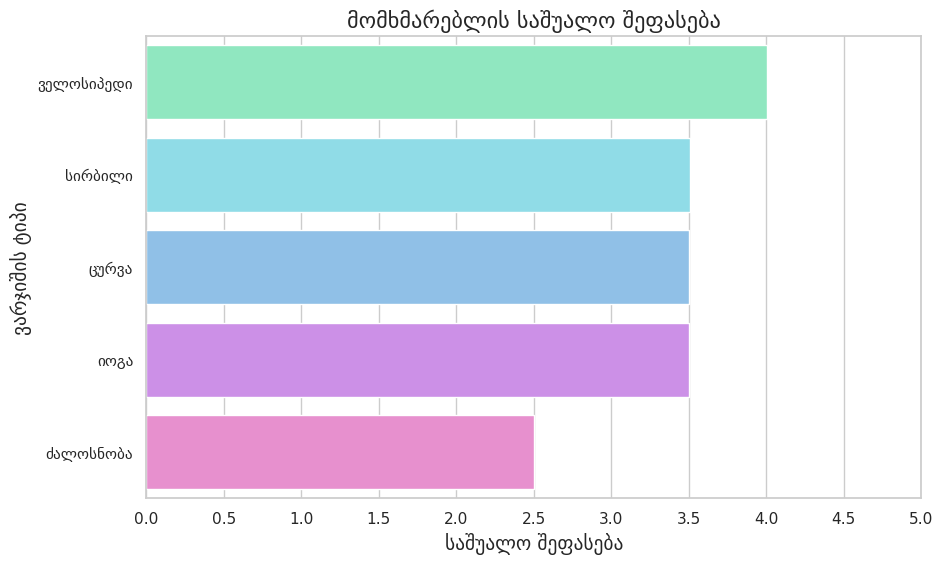

In [146]:
custom_palette = ['#82f5c1', '#82e7f5','#82c1f5', '#d282f5','#f582d4'] 

plt.figure(figsize=(10, 6))
sns.barplot(x=workout_ratings.values, y=workout_ratings.index, hue=workout_ratings.index, palette=custom_palette, legend=False)
plt.xlim(0, 5) 
plt.xticks([i * 0.5 for i in range(11)])  

plt.title('მომხმარებლის საშუალო შეფასება', fontsize=16)
plt.xlabel('საშუალო შეფასება', fontsize=14)
plt.ylabel('ვარჯიშის ტიპი', fontsize=14)

plt.show()

**დაკვირვებები:**
- **ყველაზე მაღალი შეფასება**:
ანალიზის საფუძველზე, აქტიური მომხმარებლის შეფასებით მკვეთრად გამოირჩევა ვარჯიშის ტიპი - **ველოსიპედი** (საშუალო შეფასება 4 ქულა).

- **ყველაზე დაბალი შეფასება**:
მომხმარებლის შეფასების შედეგად დადგინა, რომ არსებულ ვარჯიშის ტიპებს შორის **ძალოსნობა** (საშუალო შეფასება 2.5 ქულა) ნაკლებად მოსაწონია.

**შეხედულება:**
- მაღალი შეფასება ველოსიპედზე მიუთითებს, რომ ბიზნესმა მეტი ყურადღება უნდა მიაქციოს მას და მეტად განავითაროს, რადგან აშკარაა, რომ აქტიურ მომხმარებლებში ის დიდი პოპულარობით სარგებლობს.

- დაბალი შეფასება ძალოსნობაზე მიუთითებს მომხმარებლების უკმაყოფილებას ამ ვარჯიშის ტიპის მიმართ, რაც აქტიური მომხმარებლების დაკარგვის პოტენციალს ზრდის.


*ბიზნესისთვის რეკომენდებულია მომხმარებლების გამოკითხვა იმის გასარკვევად, თუ რა პრობლემები აქვთ ძალოსნობასთან (ან ზოგადად ვარჯიშის ტიპებთან) მიმართებით და როგორ შეიძლება ამ შედეგის გაუმჯობესება.*

## **5. ვარჯიშის ხანგრძლივობისა და კალორიების წვის კორელაცია**

განვიხილოთ, არის თუ არა კავშირი ვარჯიშის ხანგრძლივობასა და დამწვარ კალორიებს შორის:


In [149]:
correlation =df['ხანგრძლივობა'].corr(df['დამწვარი კალორიები']) # გამოიყენეთ .corr() ფუნქცია

print(f"კორელაცია ხანგრძლივობასა და დამწვარ კალორიებს შორის: {correlation:.2f}")

კორელაცია ხანგრძლივობასა და დამწვარ კალორიებს შორის: 0.86


**ანალიზი:** აღნიშნული კორელაცია არის **0.86**, ეს კი მიუთითებს ძალიან ძლიერ დადებით კავშირზე ვარჯიშის ხანგრძლივობასა და დამწვარ კალორიებს შორის.  
ე.ი თუ ვარჯიშის ხანგრძლივობა იზრდება, მაშინ დამწვარი კალორიების რაოდენობაც იზრდება, რის შედეგადაც, შეგვიძლია ვივარაუდოთ, რომ მომხმარებლები, რომლებიც უფრო დიდხანს ვარჯიშობენ, უფრო მეტ კალორიას წვავენ.

**სტრატეგია:** აუცილებელია, უფრო მეტი ინფორმაციის გავრცელება, რათა აქტიურმა ან პოტენციურმა მომხმარებელმა გაიგოს, თუ როგორ შეუძლია ხანგრძლივ ვარჯიშს, მეტი კალორიების წვა.


### **6. ყოველთვიური ჩართულობის ტენდენციები**

განვიხილოთ, როგორ მერყეობს მომხმარებელთა ჩართულობა წლის განმავლობაში:



In [152]:
df['თარიღი'] = pd.to_datetime(df['თარიღი'])

# თარიღი გარდაქმენით თვედ
df['თვე'] = df['თარიღი'].dt.to_period('M')

monthly_engagement = df.groupby('თვე').agg({
    'მომხმარებლის ID': 'count',
    'ხანგრძლივობა': 'mean',
    'დამწვარი კალორიები': 'mean'
}) # აქაც გამოიყენეთ df.groupby(), .agg(), 'count','mean'

monthly_engagement.columns = ['სესიები', 'საშუალო ხანგრძლივობა', 'საშუალო კალორიები']
monthly_engagement =monthly_engagement.sort_values('სესიები', ascending=False) # დაალაგეთ კლებადობით, გამოიყენეთ .sort_values()

print(monthly_engagement)

best_month =monthly_engagement.index[0] # გამოიყენეთ .index[]
worst_month =monthly_engagement.index[-1] # გამოიყენეთ .index[]

print(f"\nსაუკეთესო თვე: {best_month}")
print(f"ყველაზე ცუდი თვე: {worst_month}")

         სესიები  საშუალო ხანგრძლივობა  საშუალო კალორიები
თვე                                                      
2023-01    42562             43.636475         254.700382
2023-05    42554             43.475953         254.345377
2023-10    42552             43.443936         253.868628
2023-03    42470             43.435890         253.659509
2023-07    42421             43.389336         253.156022
2023-09    41361             43.527582         254.030062
2023-11    41134             43.570786         254.487311
2023-06    40948             43.572326         254.867099
2023-04    40839             43.505032         254.122083
2023-08    39607             43.471028         253.754549
2023-02    38347             43.541480         254.459107
2023-12    22686             43.558701         254.089520

საუკეთესო თვე: 2023-01
ყველაზე ცუდი თვე: 2023-12


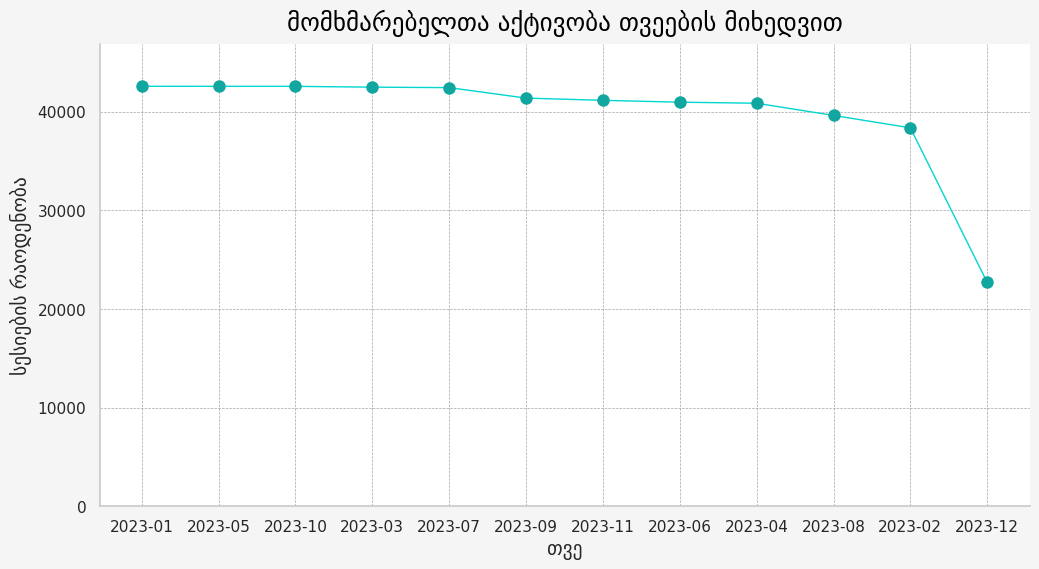

In [174]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('#f5f5f5') 
ax.set_facecolor('#ffffff')        


ax.plot(monthly_engagement.index.astype(str), monthly_engagement['სესიები'], color='#02d6cf', marker='o',markersize=9, linestyle='-',zorder=3,markerfacecolor='#12a6a1', markeredgewidth=0,linewidth=1, label='სესიები')


# for i, value in enumerate(monthly_engagement['სესიები']):
#     ax.vlines(x=str(monthly_engagement.index[i]), ymin=0, ymax=value, color='skyblue', linestyle='--', linewidth=1)

    
ax.set_ylim(0, max(monthly_engagement['სესიები']) * 1.1) 

ax.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('თვე', fontsize=14)
ax.set_ylabel('სესიების რაოდენობა', fontsize=14)
plt.title('მომხმარებელთა აქტივობა თვეების მიხედვით', fontsize=18,c='black',pad=10)

plt.show()


**დაკვირვებები:**
- მომხმარებელთა ჩართულობა პიკს აღწევს 2023 წლის **იანვარში** (42,562 სესია).
- მომხმარებელთა ჩართულობას მნიშვნელოვანი კლება გვაქვს 2023 წლის **დეკემბერში** (22,686 სესია).

**შეხედულება:**

პიკები:
- იანვარში პიკი შეიძლება გამოწვეული იყოს დღესასწაულების (ახალი წელი, შობა და სხვა) გასვლის შედეგად, როდესაც ხალხი უკვე აქტიურად იწყებს ვარჯიშს.
- მაისის თვეში მომხმარებელთა ჩართულობა მეორე ადგილს იკავებს 42,554 სესიით, რაც შეიძლება განპირობებული იყოს სეზონური ცვლილების (ზაფხულის მოახლოების) გამო.

კლება:
- დეკემბერში ჩართულობის ვარდნას შესაძლოა განაპირობებდეს ამ თვეში მიმდინარე დღესასწაულები, რაზეც თითქმის ყველა ადამიანი გადართულია და რის გამოც, ხალხი ნაკლებად არის ფოკუსირებული ვარჯიშზე.

**სტრატეგია:**
- ზემოაღნიშნული კვლევის შედეგად, მოხმარებლები ყველაზე მეტად ჩართულნი არიან იანვარში, ამიტომ ამ ანალიზის გამოყენება შეგვიძლია ახალი წლის პროგრამების დანერგვით.
- შესაძლებელია ე.წ "pre-summer" 3 თვიანი პროგრამების დანერგვა, მარტი-მაისის პერიოდისთვის, რაც გამოიწვევს გაზაფხულის სეზონზე მეტი ადამიანის ჩართულობას.
- რადგანაც დეკემბრის თვეში მოხმარებლის ჩართულობის მნიშვნელოვანი კლება აღინიშნება, მიზანშეწონილია, ისეთი მარკეტინგული კამპანიების გატარება, რომელიც ხელს შეუწყობს ხალხის ცნობიერების ამაღლებას ჯანსაღ ცხოვრებასა და დღესასწაულების ურთიერთბალანსზე.





## **7. მომხმარებელთა თანმიმდევრულობის ანალიზი**

გავაანალიზოთ მომხმარებელთა ვარჯიშის სიხშირეთა განაწილება:


In [156]:
user_frequency = df.groupby('მომხმარებლის ID')['თარიღი'].count()
frequency_stats = user_frequency.describe()
frequency_quantiles = user_frequency.quantile([0.25, 0.5, 0.75])

print("ვარჯიშის სიხშირის სტატისტიკა:")
print(frequency_stats)
print("\nვარჯიშის სიხშირის კვანტილები:")
print(frequency_quantiles)

ვარჯიშის სიხშირის სტატისტიკა:
count    10000.000000
mean        47.748100
std         15.785087
min         12.000000
25%         36.000000
50%         45.000000
75%         57.000000
max        127.000000
Name: თარიღი, dtype: float64

ვარჯიშის სიხშირის კვანტილები:
0.25    36.0
0.50    45.0
0.75    57.0
Name: თარიღი, dtype: float64


**ანალიზი:**  
1. მომხმარებელთა ჩართულობის საშუალო სიხშირე არის **47.75** ვარჯიში წელიწადში, ხოლო სტანდარტული გადახრა - **15.79**.  
აქედან გამომდინარე:  
საშუალოდ, მომხმარებლები ვარჯიშობენ დაახლოებით წელიწადში **47-ჯერ**.  
სტანდარტული გადახრა გვიჩვენებს, რომ არსებობს საკმაოდ დიდი "გაბნევა" - მომხმარებლებს შორის - ზოგი უფრო **ხშირად** ვარჯიშობს (საშუალოდ 62 ვარჯიშამდე წელიწადში), ზოგი კი - უფრო **იშვიათად** (საშუალოდ მხოლოდ 32-ჯერ წელიწადში).
2. მომხმარებლების 25% და 75%-ის სიხშირე:  
მომხმარებლების 25% ვარჯიშობს **36-ჯერ ან ნაკლებად** წელიწადში, ხოლო 75% ვარჯიშობს **57-ჯერ ან ნაკლებად** წელიწადში.
3. მედიანა (50% კვანტილი):  
მომხმარებლების ნახევარი ვარჯიშობს **45-ჯერ ან ნაკლებად** წელიწადში.

**რეკომენდაცია:**  

* **ცნობიერების ამაღლება** - გაავრცელეთ მოკლე, ინფორმაციული ვიდეოები, სადაც მკაფიოდ იქნება დემონსტირებული რეგულარული ვარჯიშის დადებითი მხარეები.
* **ვარჯიშის შეხსენების სისტემა** - გაუგზავნეთ მომხმარებელს მოტივაციური შეტყობინებები და შეახსენეთ მას, რომ ვარჯიშის დრო მოვიდა.
* **უკუკავშირის მიღება** - ჩაატარეთ რეგულარული გამოკითხვები ნაკლებად აქტიური მომხმარებლების აზრებისა და საჭიროებების გასაგებად.



## **8. რეკომენდაციები**

ჩატარებული ანალიზის საფუძველზე სამი ძირითადი რეკომენდაცია FitTech-ისთვის:

1. **ვარჯიშის ტიპების ოპტიმიზაცია:**

 - უკვე წარმატებული და მაღალი აქტიურობით გამორჩეული ვარჯიშის ტიპების  პროგრამების მეტად გაფართოება მათი მაღალი პოპულარობის გათვალისწინებით
  - **ძალოსნობის** გაუმჯობესება, რადგან მას აქვს როგორც ყველაზე დაბალი შეფასება, ისე ყველაზე ნაკლები სესიის მაჩვვენებელი, პარალელურად, ნაკლებად მოთხოვნადი ვარჯიშის ტიპების პოპულარიზაცია
  - ახალი ვარჯიშის ტიპების დანერგვა


2. **ვარჯიშის პროგრამების განვითარება:**

- სპეციალური სეზონური პროგრამების შემუშავება დეკემბრის თვეში დაბალი აქტივობის გამოსასწორებლად.
- ცნობიერების ამაღლების კამპანიების წარმოება


3. **მომხმარებელთა გამოცდილების გაუმჯობესება:**

- რეგურალური გამოკითხვების ჩატარება მომხმარებლისგან უკუკავშირის მისაღებად

## **9. დასკვნა**

2023 წლის მონაცემებზე დაყრდნობით, FitTech-მა მნიშვნელოვანი შედეგები აჩვენა **10,000 აქტიური მომხმარებლითა** და **477,481 ჩატარებული ვარჯიშის სესიით**.  
ვარჯიშის ტიპებიდან ჩართულობის მხრივ ლიდერობდა **სირბილი**, ხოლო მომხმარებელთა აქტიურობის პიკი დაფიქსირდება ამავე წლის **იანვარში**.

ანალიზი აჩვენებს, რომ FitTech-ს აქვს პოტენციალი გაზარდოს მომხმარებელთა ჩართულობა. ამის მიღწევა კი შესაძლებელია ნაკლებად პოპულარული ვარჯიშების გაუმჯობესებით და სეზონური აქტივობების (განსაკუთრებით დეკემბერში) ოპტიმიზაციით.

**მნიშვნელოვანი ფაქტები:**

1. FitTech მომხმარებლები საშუალოდ ატარებენ 47 ვარჯიშს წელიწადში.
2. ვარჯიშის ტიპებს შორის სირბილი ლიდერობს სესიების რაოდენობითა და ჯამური დამწვარი კალორიებით.
3. ვარჯიშის ტიპებს შორის ველოსიპედი ლიდერობს ყველაზე მაღალი საშუალო შეფასებით(4/5)
4. არსებობს ძლიერი დადებითი კორელაცია (0.86) ვარჯიშის ხანგრძლივობასა და დამწვარ კალორიეს შორის
5. მომხმარებელთა ჩართულობა პიკს აღწევს იანვარში, ხოლო მნიშვნელოვანი კლება აქვს დეკემბრის თვეში.

**რეკომენდაციები**

- *რისი გაუმჯობესება შეუძლია FitTech-ს და როგორ?*

პირველ რიგში, რეკომენდებულია უკვე წარმატებული პროგრამების უფრო მეტად გაფართოება. პარალელურად, მნიშვნელოვანია ნაკლებად მოთხოვნადი ვარჯიშის ტიპების პოპულარიზაცია, რაც შესაძლოა მოიცავდეს მათი ფორმატის გადახედვას ან ახალი ელემენტების დამატებას.  
განსაკუთრებული ყურადღება უნდა დაეთმოს სეზონური პროგრამების შემუშავებას, რათა შენარჩუნდეს მომხმარებელთა მაღალი ჩართულობა მთელი წლის განმავლობაში, განსაკუთრებით კი დეკემბრის თვეში.  
მომხმარებელთა გამოცდილების გაუმჯობესებისთვის მნიშვნელოვანია რეგულარული უკუკავშირის მიღება და ანალიზი. ამისთვის რეკომენდებულია რეგულარული გამოკითხვების ჩატარება, რაც საშუალებას მოგვცემს უკეთ გავიგოთ მომხმარებელთა საჭიროებები.

- *რას გამოიწვევს ეს ბაზარზე პოზიციონირების თვალსაზრისით?*

ზემოაღნიშნული რეკომენდაციები FitTech-ს საშუალებას მისცემს კიდევ უფრო გააძლიეროს თავისი პოზიცია ბაზარზე. მრავალფეროვანი პროგრამები მოიზიდავს ახალ მომხმარებლებს, ხოლო არსებული მომხმარებლების კმაყოფილების ზრდა გაზრდის მათ ლოიალურობას. საბოლოო ჯამში, ეს ყველაფერი კომპანიას მნიშვნელოვან კონკურენტულ უპირატესობას მიანიჭებს.

**შეჯამება**  

საბოლოო ჯამში, ანალიზის საფუძველზე, FitTech-ს ნამდვილად აქვს შესაძლებლობა, გაზარდოს მომხმარებელთა ჩართულობა და გააუმჯობესოს მათი გამოცდილება, ეს კი გახდის კომპანიას კიდევ უფრო მეტად კონკურენტულუნარიანს არსებულ ბაზარზე და გამოიწვევს მის სამომავლო ზრდას.


